In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [9]:
categories = ["alt.atheism", "talk.religion.misc"]

data = fetch_20newsgroups(subset = "train", categories = categories)

X = data["data"]
y = data["target"]

print(len(X))
print(y.shape)

857
(857,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    stratify = y, 
                                                    random_state = 1234)

print(y_train.shape)
print(y_test.shape)

(514,)
(343,)


In [5]:
print(X_train[0])
print(y_train[0])

From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: <Political Atheists?
Organization: California Institute of Technology, Pasadena
Lines: 62
NNTP-Posting-Host: punisher.caltech.edu

(reference line trimmed)

SSAUYET@eagle.wesleyan.edu (SCOTT D. SAUYET) writes:

>First, I'll make the assumption that you agree that a murderer is one
>who has commited murder.

Well, I'd say that a murderer is one who intentionally committed a murder.
For instance, if you put a bullet into a gun that was thought to contain
blanks, and someone was killed with such a gun, the person who actually
performed the action isn't the murderer (but I guess this is actually made
clear in the below definition).

>I'd be interested to see a more reasonable definition. 

What do you mean by "reasonable?"

>Otherwise, your inductive definition doesn't bottom out:
>Your definition, in essence, is that
>>Murder is the intentional killing of someone who has not commited 
>>murder, against his will.
>Expanding t

In [6]:
print(X_train[1])
print(y_train[1])

From: Nanci Ann Miller <nm0w+@andrew.cmu.edu>
Subject: Re: Concerning God's Morality (long)
Organization: Sponsored account, School of Computer Science, Carnegie Mellon, Pittsburgh, PA
Lines: 56
	<1993Apr5.084042.822@batman.bmd.trw.com>
NNTP-Posting-Host: po5.andrew.cmu.edu
In-Reply-To: <1993Apr5.084042.822@batman.bmd.trw.com>


jbrown@batman.bmd.trw.com writes:
> > Sorry, but there are no supernatural
> > forces necessary to create a pathogen.  You are saying, "Since
> > diseases are bad, the bad entity must have created it."  So
> > what would you say about acid rain, meteors falling from the
> > sky, volcanoes, earthquakes, and other QUOTE UNQUOTE "Acts
> > of God?" 
> 
> I would say that they are not "acts of God" but natural
> occurrences.

It amazes me that you have the audacity to say that human creation was not
the result of the natural process of evolution (but rather an "act of God")
and then in the same post say that these other processes (volcanos et al.)
are natural occurr

In [7]:
pipe = Pipeline([("feature", TfidfVectorizer()),
                 ("classification", LinearSVC())])

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 12345)

param_grid = [{"feature__sublinear_tf": [True, False],
               "feature__max_features": [100, 500, None],
               "classification__C": [1, 10]}]

# 3 x (2 x 3 x 2) model will be trained within cross-validation using 40% data
# 12 average performance metric will be calculated for parameter combinations
# the best parameter combination will be picked
# a single model will be trained using 60% data with the best parameter combination

gscv = GridSearchCV(pipe, param_grid, cv = cv)
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('feature', TfidfVectorizer()),
                                       ('classification', LinearSVC())]),
             param_grid=[{'classification__C': [1, 10],
                          'feature__max_features': [100, 500, None],
                          'feature__sublinear_tf': [True, False]}])

In [8]:
print(gscv.best_params_)
print(gscv.best_estimator_)

{'classification__C': 10, 'feature__max_features': None, 'feature__sublinear_tf': True}
Pipeline(steps=[('feature', TfidfVectorizer(sublinear_tf=True)),
                ('classification', LinearSVC(C=10))])


In [9]:
y_train_hat = gscv.predict(X_train)
y_test_hat = gscv.predict(X_test)

train_acc = accuracy_score(y_train, y_train_hat)
test_acc = accuracy_score(y_test, y_test_hat)

print(train_acc, test_acc)

1.0 0.9591836734693877


In [10]:
from collections import Counter
import string

word_counter = Counter()
doc_freq_counter = Counter()
lengths = []
max_length = 0
for text_doc in X_train:
    doc_set = set()
    tmp = text_doc.translate(str.maketrans("", "",
        string.digits + '’!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\'\n')).lower().split()
    for word in tmp:
        word_counter[word] += 1
        if not(word in doc_set):
            doc_freq_counter[word] += 1
            doc_set.add(word)
    max_length = np.max((max_length, len(tmp)))
    lengths.append(len(tmp))

In [11]:
print(len(word_counter.keys()))
print(max_length)

22093
8021


In [12]:
print(np.max(lengths), np.mean(lengths), np.std(lengths))

8021 318.591439688716 530.8229573660119


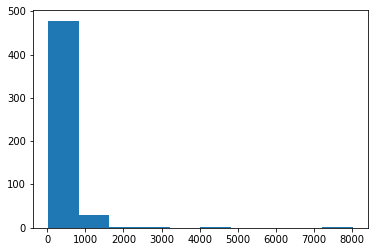

In [13]:
plt.hist(lengths)
plt.show()

In [14]:
def plot_most_common(counter, number):
    list_of_tuples = counter.most_common(number)
    words = []
    unzipped = list(zip(*list_of_tuples))
    most_common_words = unzipped[0]
    frequencies = unzipped[1]
    plt.figure(figsize = (16, 7))
    plt.bar(range(number), frequencies)
    plt.xticks(range(number), most_common_words)
    plt.show()
    return most_common_words

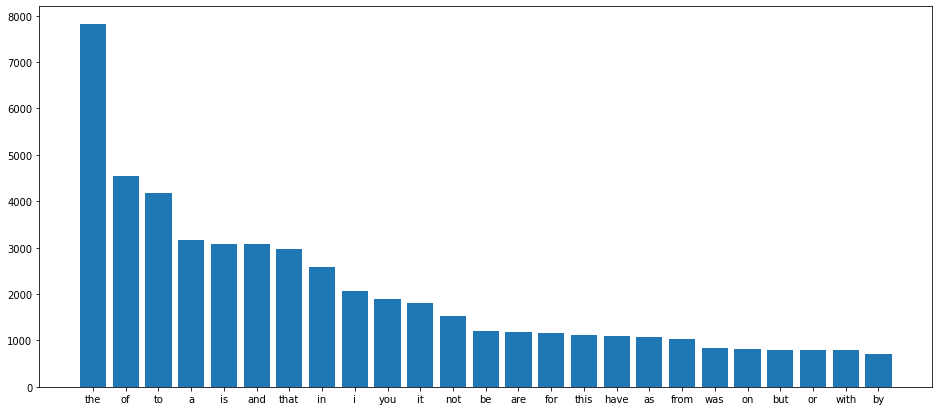

In [15]:
most_common_words = plot_most_common(word_counter, 25)

In [16]:
tfidf = Counter()
N = len(X_train)
swc = sum(word_counter.values())

# very simple tfidf => not the original one used in the literature
for word in word_counter.keys():
    tfidf[word] = word_counter[word] / doc_freq_counter[word]

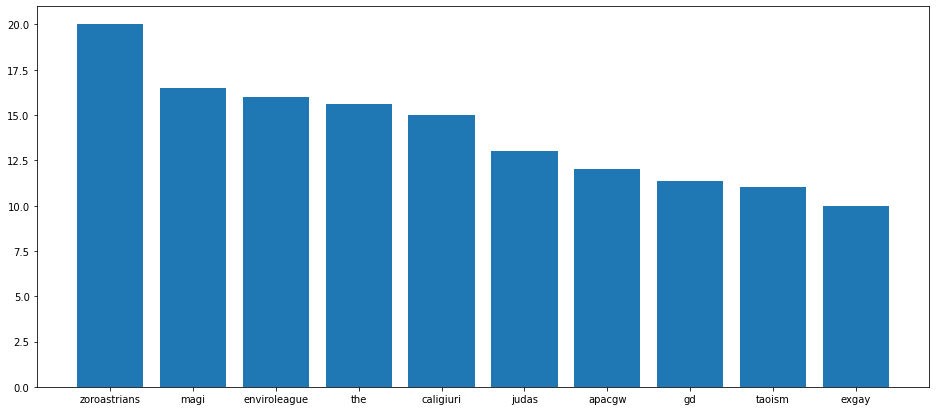

In [17]:
most_common_words_tfidf = plot_most_common(tfidf, 10)

In [18]:
replace_list = set()
for word in most_common_words:
    replace_list.add(word)
    
max_length = 0
word_counter = Counter()
X_train_new = []
for text_doc in X_train:
    tmp = text_doc.translate(str.maketrans("", "",
        string.digits + '’!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\'\n')).lower().split()
    text_doc_new = ""
    for word in tmp:
        if not(word in replace_list):
            word_counter[word] += 1
            text_doc_new += " " + word
    X_train_new.append(text_doc_new)
    max_length = np.max((max_length, len(tmp)))

print(len(word_counter.keys()))
print(max_length)

22068
8021


In [19]:
X_test_new = []
for text_doc in X_test:
    tmp = text_doc.translate(str.maketrans("", "",
        string.digits + '’!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\'\n')).lower().split()
    text_doc_new = ""
    for word in tmp:
        if not(word in replace_list):
            text_doc_new += " " + word
    X_test_new.append(text_doc_new)

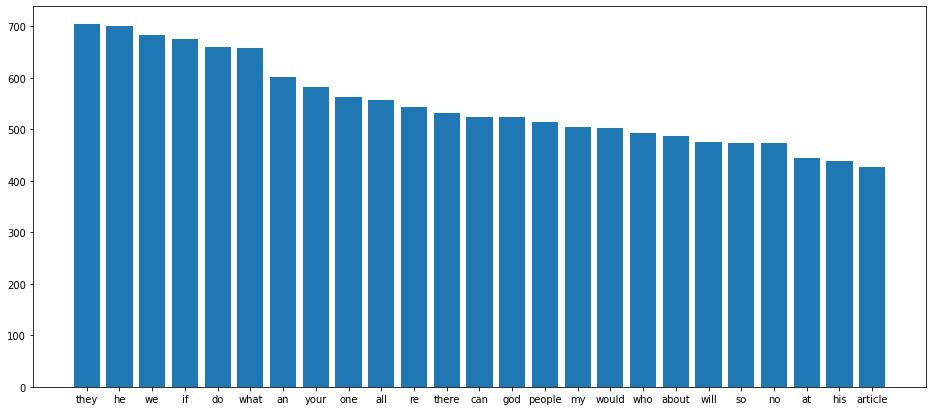

In [20]:
most_common_words = plot_most_common(word_counter, 25)

In [21]:
vocabulary_size = len(word_counter.keys())
print(vocabulary_size)
tokenizer = keras.preprocessing.text.Tokenizer(num_words = vocabulary_size + 1)
tokenizer.fit_on_texts(X_train_new)

encoded_train = tokenizer.texts_to_sequences(X_train_new)
encoded_test = tokenizer.texts_to_sequences(X_test_new)

22068


In [22]:
print(encoded_train[1])

[1811, 1163, 1539, 3870, 11, 1164, 118, 76, 3871, 2312, 774, 974, 459, 141, 2313, 2314, 2315, 2659, 8136, 2660, 5168, 60, 534, 12, 22, 1540, 1660, 521, 880, 8137, 215, 130, 1661, 326, 326, 2661, 79, 219, 21, 6, 17, 41, 19, 3167, 3872, 8138, 3873, 2662, 8139, 8140, 43, 298, 8141, 302, 14, 17, 41, 1, 302, 14, 393, 8142, 8143, 28, 8144, 41, 344, 681, 5169, 460, 393, 914, 915, 163, 7, 303, 3874, 37, 96, 213, 41, 65, 43, 1662, 8145, 1165, 8146, 393, 8147, 18, 616, 116, 568, 6, 91, 8148, 1662, 6, 775, 302, 14, 46, 5, 39, 5170, 128, 550, 227, 157, 393, 3875, 975, 8149, 405, 17, 293, 136, 428, 8150, 371, 158, 267, 810, 68, 54, 4, 345, 64, 125, 5, 476, 8151, 1336, 915, 2031, 811, 17, 2032, 45, 130, 1247, 8152, 118, 8153, 4, 3, 568, 280, 881, 118, 97, 1247, 3876, 37, 73, 131, 22, 2663, 12, 5171, 617, 99, 2316, 520, 9, 65, 3, 499, 592, 1336, 5172, 30, 2664, 460, 7, 5173, 284, 86, 304, 106, 2316, 8154, 812, 2316, 1440, 319, 14, 840, 1247, 154, 1441, 5174, 3876, 4, 976, 266, 1812, 5175, 445, 520, 4

In [23]:
max_length = 128
padded_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_train,
                                                             maxlen = max_length,
                                                             padding = "post",
                                                             truncating = "pre")

padded_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_test,
                                                            maxlen = max_length,
                                                            padding = "post",
                                                            truncating = "pre")

In [24]:
print(padded_train[1]) # goes, going, went, gone, go

[  86  304  106 2316 8154  812 2316 1440  319   14  840 1247  154 1441
 5174 3876    4  976  266 1812 5175  445  520  487  976   37   14   20
  841  617  520 1541  976 8155 1542  154   15   54 8156    1   64 1543
   21 8157   52  117  154 1248    5 2033  487  810 3877 8158  305   40
   15  131 8159  258    1   29  487   37 8160 2665  258    3  159 5176
 2666   19    6 3168 1030    8   14  119  461   56    2   44 2667 2317
  154  326   15   37    1   10   79  326 2318  977   48 2668  446  336
 8161   53   61  842 8162 5177   21  210  106    1   98 8163  418  228
 8164   39  239 1031  298  192 1096 3878 5178 2319   40 2320 3879   50
  978  201]


In [25]:
embedding_dim = 128

rnn_model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size + 1, embedding_dim, input_length = max_length),
    keras.layers.GRU(units = 256),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation = "sigmoid")
])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 128)          2824832   
                                                                 
 gru (GRU)                   (None, 256)               296448    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

2022-08-14 11:17:30.109149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
rnn_model.compile(optimizer = "adam",
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

In [27]:
early_stop = keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                           patience = 10)

model_save = keras.callbacks.ModelCheckpoint("checkpoint_news",
                                             monitor = "val_accuracy",
                                             save_best_only = True,
                                             save_weights_only = True,
                                             mode = "max")

rnn_history = rnn_model.fit(padded_train, y_train,
                            epochs = 100, verbose = 1,
                            validation_split = 0.2,
                            callbacks = [early_stop, model_save])

Epoch 1/100
13/13 [==============================] - 3s 151ms/step - loss: 0.7239 - accuracy: 0.4745 - val_loss: 0.6926 - val_accuracy: 0.5534
Epoch 2/100
13/13 [==============================] - 2s 129ms/step - loss: 0.6427 - accuracy: 0.6375 - val_loss: 0.6914 - val_accuracy: 0.5825
Epoch 3/100
13/13 [==============================] - 2s 130ms/step - loss: 0.5142 - accuracy: 0.7640 - val_loss: 0.6887 - val_accuracy: 0.6019
Epoch 4/100
13/13 [==============================] - 2s 117ms/step - loss: 0.4042 - accuracy: 0.7810 - val_loss: 0.6881 - val_accuracy: 0.5728
Epoch 5/100
13/13 [==============================] - 2s 116ms/step - loss: 0.3997 - accuracy: 0.7445 - val_loss: 0.6779 - val_accuracy: 0.5922
Epoch 6/100
13/13 [==============================] - 2s 122ms/step - loss: 0.3693 - accuracy: 0.7908 - val_loss: 0.6815 - val_accuracy: 0.5825
Epoch 7/100
13/13 [==============================] - 2s 140ms/step - loss: 0.3388 - accuracy: 0.7932 - val_loss: 0.6739 - val_accuracy: 0.6311

In [28]:
rnn_model.load_weights("checkpoint_news")

In [29]:
rnn_model.evaluate(padded_train, y_train)

17/17 [==============================] - 0s 27ms/step - loss: 0.2986 - accuracy: 0.9222


[0.2986149489879608, 0.9221789836883545]

In [30]:
rnn_model.evaluate(padded_test, y_test)

11/11 [==============================] - 0s 28ms/step - loss: 0.6611 - accuracy: 0.8076


[0.6611387133598328, 0.8075801730155945]